# Linear Regression

In [2]:
#https://ffiec.cfpb.gov/data-publication/snapshot-national-loan-level-dataset

import pandas as pd

hmdaLAR = pd.read_csv('C:/Data/2017_public_lar.txt',sep='|',header=None)

hmdaLAR.columns = [
    "As of Year",
    "Respondent ID",
    "Agency Code",
    "Loan Type",
    "Property Type",
    "Loan Purpose",
    "Occupancy",
    "Loan Amount (000s)",
    "Preapproval",
    "Action Type",
    "MSA/MD",
    "State Code",
    "County Code",
    "Census Tract Number",
    "Applicant Ethnicity",
    "Co Applicant Ethnicity",
    "Applicant Race 1",
    "Applicant Race 2",
    "Applicant Race 3",
    "Applicant Race 4",
    "Applicant Race 5",
    "Co Applicant Race 1",
    "Co Applicant Race 2",
    "Co Applicant Race 3",
    "Co Applicant Race 4",
    "Co Applicant Race 5",
    "Applicant Sex",
    "Co Applicant Sex",
    "Applicant Income (000s)",
    "Purchaser Type",
    "Denial Reason 1",
    "Denial Reason 2",
    "Denial Reason 3",
    "Rate Spread",
    "HOEPA Status",
    "Lien Status",
    "Edit Status",
    "Sequence Number",
    "Population",
    "Minority Population %",
    "FFIEC Median Family Income",
    "Tract to MSA/MD Income %",
    "Number of Owner-occupied units",
    "Number of 1-to 4-Family units",
    "Application Date Indicator"
]


### Code Mapping

In [6]:
# mappings taken from code sheet provided by ffiec
# https://ffiec.cfpb.gov/data-publication/snapshot-national-loan-level-dataset

agencyCodeMap = pd.Series(
    ['Office of the Comptroller of the Currency (OCC)',
    'Federal Reserve System (FRS)',
    'Federal Deposit Insurance Corporation (FDIC)',
    'National Credit Union Administration (NCUA)',
    'Department of Housing and Urban Development (HUD)',
    'Consumer Financial Protection Bureau (CFPB)'], 
    index=[1,2,3,5,7,9])

loanTypeMap = pd.Series(
    [
        'Conventional (any loan other than FHA, VA, FSA, or RHS loans)',
        'FHA-insured (Federal Housing Administration)',
        'VA-guaranteed (Veterans Administration)',
        'FSA/RHS (Farm Service Agency or Rural Housing Service)'
    ],
    index=[1,2,3,4])

propertyTypeMap = pd.Series(
    [
        'One to four-family (other than manufactured housing)',
        'Manufactured housing',
        'Multifamily'
    ],
    index=[1,2,3])

loanPurposeMap = pd.Series(
    [
        'Home purchase',
        'Home improvement',
        'Refinancing'
    ],
    index=[1,2,3])

occupancyMap = pd.Series(
    [
        'Owner-occupied as a principal dwelling',
        'Not owner-occupied',
        None
    ],
    index=[1,2,3])

preapprovalMap = pd.Series(
    [
        'Preapproval was requested',
        'Preapproval was not requested',
        None
    ],
    index=[1,2,3])

actionTakenMap = pd.Series(
    [
        'Approved',
        'Approved',
        'Denied',
        None,
        None,
        'Approved',
        'Denied',
        'Approved',
    ],
    index=[1,2,3,4,5,6,7,8])

ethnicityMap = pd.Series(
    [
        'Hispanic or Latino',
        'Not Hispanic or Latino',
        None,
        None,
        None
    ],
    index=[1,2,3,4,5])

raceMap = pd.Series(
    [
        'American Indian or Alaska Native',
        'Asian',
        'Black or African American',
        'Native Hawaiian or Other Pacific Islander',
        'White',
        None,
        None,
        'No co-applicant'
    ],
    index=[1,2,3,4,5,6,7,8])

sexMap = pd.Series(
    [
        'Male',
        'Female',
        None,
        None,
        'No co-applicant'
    ],
    index=[1,2,3,4,5])

purchaserTypeMap = pd.Series(
    [
        'Loan was not originated or was not sold in calendar year covered by register',
        'Fannie Mae (FNMA)',
        'Ginnie Mae (GNMA)',
        'Freddie Mac (FHLMC)',
        'Farmer Mac (FAMC)',
        'Private securitization',
        'Commercial bank, savings bank or savings association',
        'Life insurance company, credit union, mortgage bank, or finance company',
        'Affiliate institution',
        'Other type of purchaser'
    ],
    index=[0,1,2,3,4,5,6,7,8,9])

denialReasonMap = pd.Series(
    [
        'Debt-to-income ratio',
        'Employment history',
        'Credit history',
        'Collateral',
        'Insufficient cash (down payment, closing costs)',
        'Unverifiable information',
        'Credit application incomplete',
        'Mortgage insurance denied',
        'Other'
    ],
    index=[1,2,3,4,5,6,7,8,9])

hoepaMap = pd.Series(
    [
        'HOEPA loan',
        'Not a HOEPA loan'
    ],
    index=[1,2])

lienMap = pd.Series(
    [
        'Secured by a first lien',
        'Secured by a subordinate lien',
        'Not secured by a lien',
        'Not applicable (purchased loans)'
    ],
    index=[1,2,3,4])

hmdaLAR["Action Type"].replace(actionTakenMap,inplace=True)
hmdaLAR["Agency Code"].replace(agencyCodeMap,inplace=True)
hmdaLAR["Loan Type"].replace(loanTypeMap,inplace=True)
hmdaLAR["Property Type"].replace(propertyTypeMap,inplace=True)
hmdaLAR["Loan Purpose"].replace(loanPurposeMap,inplace=True)
hmdaLAR["Occupancy"].replace(occupancyMap,inplace=True)
hmdaLAR["Preapproval"].replace(preapprovalMap,inplace=True)
hmdaLAR["Action Type"].replace(actionTakenMap,inplace=True)
hmdaLAR["Applicant Ethnicity"].replace(ethnicityMap,inplace=True)
hmdaLAR["Co Applicant Ethnicity"].replace(ethnicityMap,inplace=True)
hmdaLAR["Applicant Race 1"].replace(raceMap,inplace=True)
hmdaLAR["Applicant Race 2"].replace(raceMap,inplace=True)
hmdaLAR["Applicant Race 3"].replace(raceMap,inplace=True)
hmdaLAR["Applicant Race 4"].replace(raceMap,inplace=True)
hmdaLAR["Applicant Race 5"].replace(raceMap,inplace=True)
hmdaLAR["Co Applicant Race 1"].replace(raceMap,inplace=True)
hmdaLAR["Co Applicant Race 2"].replace(raceMap,inplace=True)
hmdaLAR["Co Applicant Race 3"].replace(raceMap,inplace=True)
hmdaLAR["Co Applicant Race 4"].replace(raceMap,inplace=True)
hmdaLAR["Co Applicant Race 5"].replace(raceMap,inplace=True)
hmdaLAR["Applicant Sex"].replace(sexMap,inplace=True)
hmdaLAR["Co Applicant Sex"].replace(sexMap,inplace=True)
hmdaLAR["Purchaser Type"].replace(purchaserTypeMap,inplace=True)
hmdaLAR["Denial Reason 1"].replace(denialReasonMap,inplace=True)
hmdaLAR["Denial Reason 2"].replace(denialReasonMap,inplace=True)
hmdaLAR["Denial Reason 3"].replace(denialReasonMap,inplace=True)
hmdaLAR["HOEPA Status"].replace(hoepaMap,inplace=True)
hmdaLAR["Lien Status"].replace(lienMap,inplace=True)

## Linear Regression

In [11]:
df = hmdaLAR[["Respondent ID","Minority Population %","Action Type"]]
df = applications_by_respondent.dropna()

df.describe(include="all")

,Respondent ID,Minority Population %,Action Type
count,11756522,1.175652e+07,11756522
unique,5750,NaN,2
top,0000451965,NaN,Approved
freq,923033,NaN,9805965
mean,NaN,3.228186e+01,NaN
std,NaN,2.601288e+01,NaN
min,NaN,0.000000e+00,NaN
25%,NaN,1.146000e+01,NaN
50%,NaN,2.428000e+01,NaN
75%,NaN,4.702000e+01,NaN


In [161]:
df2 = df.copy(deep=True)
df2["Minority %"] = round(df2["Minority Population %"]/10,0)*10

df3 = pd.DataFrame(pd.crosstab([df2["Respondent ID"],df2["Minority %"]],df2["Action Type"]))

In [162]:
df4 = df3.copy(deep=True)
df4 = df4.reset_index()
df4["Total"] = df4["Approved"]+df4["Denied"]
df4["Approval %"] = df4["Approved"]/df4["Total"]
df4 = df4.drop(["Approved","Denied"], axis=1)

from scipy import stats

results = pd.DataFrame(columns=["Respondent ID","slope","intercept","r_square","p_value","std_err","count"])
for i, r in enumerate(df4["Respondent ID"].unique()):
    x = df4[df4["Respondent ID"]==r]["Minority %"]
    y = df4[df4["Respondent ID"]==r]["Approval %"]
    count = df4[df4["Respondent ID"]==r].shape[0]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    results.loc[i] = [r, slope, intercept, r_value**2, p_value, std_err, count]

c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  con

In [208]:
import matplotlib.pyplot as plt
import numpy as np

def scatterplotter(respondent_id):
    resp = df4[df4["Respondent ID"]==respondent_id]
    lr_results = results[results["Respondent ID"]==respondent_id]

    scatData = resp
    plt.scatter(scatData["Minority %"], scatData["Approval %"])
    plt.title("Approval Rate by Minority % for "+respondent_id+" (p-value:"+str("{:.2E}".format(lr_results["p_value"].values[0]))+")",fontsize=20)
    z = np.polyfit(scatData["Minority %"], scatData["Approval %"], 1)
    p = np.poly1d(z)
    plt.plot(scatData["Minority %"],p(scatData["Minority %"]),"r--")
    plt.show()

    print(resp)

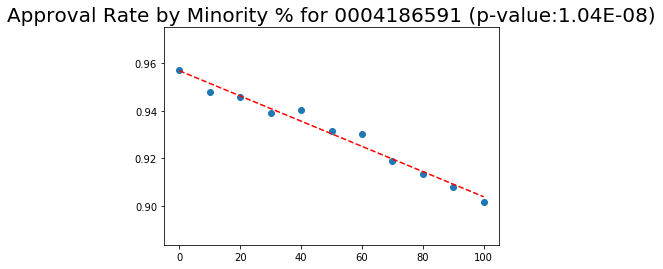

Action Type Respondent ID  Minority %  Total  Approval %
38279          0004186591         0.0  16936    0.957015
38280          0004186591        10.0  49847    0.947921
38281          0004186591        20.0  40824    0.945669
38282          0004186591        30.0  31219    0.938915
38283          0004186591        40.0  24014    0.940160
38284          0004186591        50.0  18240    0.931524
38285          0004186591        60.0  14263    0.930099
38286          0004186591        70.0  11183    0.918984
38287          0004186591        80.0  10137    0.913683
38288          0004186591        90.0   9199    0.908251
38289          0004186591       100.0   4693    0.901769



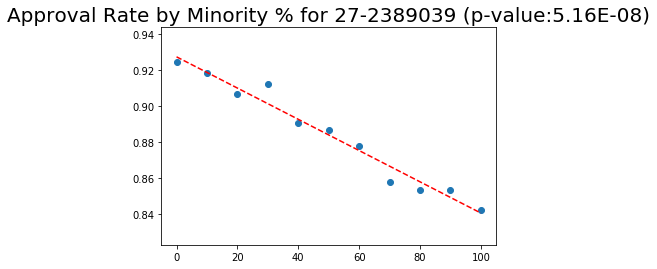

Action Type Respondent ID  Minority %  Total  Approval %
41889          27-2389039         0.0    783    0.924649
41890          27-2389039        10.0   2909    0.918529
41891          27-2389039        20.0   2234    0.906893
41892          27-2389039        30.0   1529    0.912361
41893          27-2389039        40.0    953    0.890871
41894          27-2389039        50.0    779    0.887035
41895          27-2389039        60.0    531    0.877589
41896          27-2389039        70.0    358    0.857542
41897          27-2389039        80.0    375    0.853333
41898          27-2389039        90.0    443    0.853273
41899          27-2389039       100.0    304    0.842105



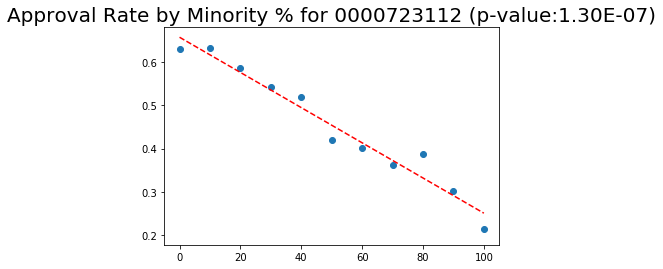

Action Type Respondent ID  Minority %  Total  Approval %
36038          0000723112         0.0   1865    0.630563
36039          0000723112        10.0   3200    0.631875
36040          0000723112        20.0   1329    0.586155
36041          0000723112        30.0    788    0.541878
36042          0000723112        40.0    405    0.518519
36043          0000723112        50.0    288    0.420139
36044          0000723112        60.0    242    0.400826
36045          0000723112        70.0    157    0.363057
36046          0000723112        80.0    155    0.387097
36047          0000723112        90.0    126    0.301587
36048          0000723112       100.0    126    0.214286



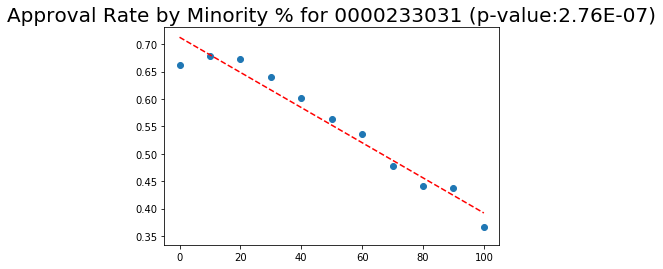

Action Type Respondent ID  Minority %  Total  Approval %
32317          0000233031         0.0   5320    0.661278
32318          0000233031        10.0  16408    0.678876
32319          0000233031        20.0  13687    0.672974
32320          0000233031        30.0   8779    0.639253
32321          0000233031        40.0   5594    0.600822
32322          0000233031        50.0   4107    0.563672
32323          0000233031        60.0   3105    0.535588
32324          0000233031        70.0   2230    0.477578
32325          0000233031        80.0   2140    0.442056
32326          0000233031        90.0   2396    0.436978
32327          0000233031       100.0   2171    0.365730



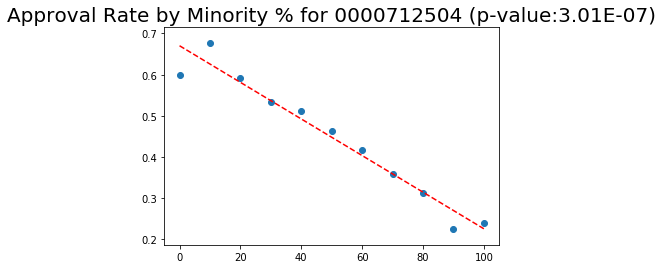

Action Type Respondent ID  Minority %  Total  Approval %
35635          0000712504         0.0    598    0.598662
35636          0000712504        10.0   1536    0.677083
35637          0000712504        20.0    759    0.591568
35638          0000712504        30.0    581    0.533563
35639          0000712504        40.0    391    0.511509
35640          0000712504        50.0    265    0.464151
35641          0000712504        60.0    228    0.416667
35642          0000712504        70.0    173    0.358382
35643          0000712504        80.0    185    0.313514
35644          0000712504        90.0    218    0.224771
35645          0000712504       100.0    201    0.238806



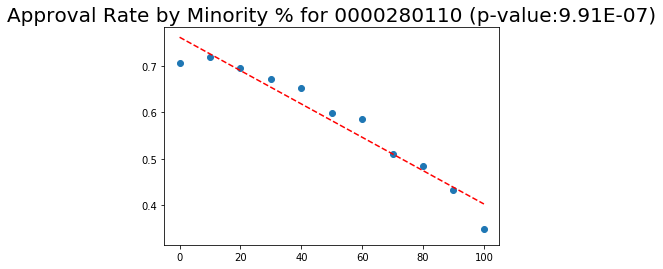

Action Type Respondent ID  Minority %  Total  Approval %
32502          0000280110         0.0   4599    0.705806
32503          0000280110        10.0  10094    0.719635
32504          0000280110        20.0   4834    0.695904
32505          0000280110        30.0   2402    0.671524
32506          0000280110        40.0   1187    0.652064
32507          0000280110        50.0    892    0.599776
32508          0000280110        60.0    622    0.585209
32509          0000280110        70.0    408    0.509804
32510          0000280110        80.0    382    0.484293
32511          0000280110        90.0    317    0.432177
32512          0000280110       100.0    266    0.349624



In [209]:
#results[(results["slope"]<-0.01) & ((results["r_square"])>0.8) & (results["count"]>6)].sort_values(by=["p_value"],ascending=True)

rl = results[(results["p_value"]<0.000001) & (results["count"]>6)].sort_values(by=["p_value"],ascending=True).sort_values(by=["p_value"],ascending=True)["Respondent ID"]

for r in rl.iteritems():
    scatterplotter(r[1])
    print()